# 🔍 Exploratory Data Analysis: Online Retail Dataset

**CIS 9660 - Data Mining for Business Analytics**  
**Class #2: Data Reporting & Visualization Agents**

---

## 📋 Learning Objectives
By the end of this tutorial, you will be able to:
- Load and inspect a real business dataset
- Identify and handle data quality issues
- Create meaningful visualizations for business insights
- Ask and answer data-driven business questions
- Prepare data for further analysis

---

## 📦 Dataset Overview
**Source:** UCI Machine Learning Repository  
**Business:** UK-based online retail company specializing in unique all-occasion gifts  
**Time Period:** December 2010 - December 2011  
**Size:** 541,909 transactions  
**Customers:** Mix of wholesalers and individual buyers from 37 countries

## 1️⃣ Setup and Data Loading

In [ ]:
# Import essential libraries
import pandas as pd # Lets you work with tables and spreadsheets (great for data).
import numpy as np # Helps with math and big lists of numbers (arrays).
import matplotlib.pyplot as plt # Used to draw graphs and charts for visualization.
import seaborn as sns # create statistical data visualizations like Histogram, Bar Plot, Scatter Plot
from datetime import datetime # is used to work with dates and times in Python
import warnings # Lets you show or hide warning messages.

# Configure visualization settings
plt.style.use('seaborn-v0_8') # Makes plots look like Seaborn style (older version)
sns.set_palette("husl") # Sets the color style for plots (HUSL = colorful and clear).
plt.rcParams['figure.figsize'] = (12, 8) # Sets default plot size to 12x8 inches
warnings.filterwarnings('ignore') # Hides warning messages to keep output clean

# Prints a success message
print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [ ]:
# Load the dataset from UCI Repository
# Method 1: Direct URL (recommended for class)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'

print("📥 Loading dataset from UCI Repository...")
df = pd.read_excel(url)
print(f"✅ Dataset loaded successfully! Shape: {df.shape}")

# Alternative methods if URL doesn't work:
# Method 2: Upload file to Colab
# from google.colab import files
# uploaded = files.upload()
# df = pd.read_excel('Online Retail.xlsx')

# Method 3: From Google Drive
# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_excel('/content/drive/MyDrive/Online_Retail.xlsx')

📥 Loading dataset from UCI Repository...
✅ Dataset loaded successfully! Shape: (541909, 8)


## 2️⃣ First Look at the Data

In [ ]:
# Basic dataset information
print("📊 DATASET OVERVIEW")
print("=" * 50)
print(f"Dataset shape: {df.shape}")
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

📊 DATASET OVERVIEW
Dataset shape: (541909, 8)
Rows: 541,909
Columns: 8
Memory usage: 134.93 MB


In [ ]:
# Display first few rows
print("🔍 FIRST 5 ROWS")
print("=" * 50)
df.head()

🔍 FIRST 5 ROWS


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Column information
print("📋 COLUMN INFORMATION")
print("=" * 50)
df.info()

📋 COLUMN INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# Statistical summary
print("📈 STATISTICAL SUMMARY")
print("=" * 50)
df.describe()

📈 STATISTICAL SUMMARY


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


## 3️⃣ Data Quality Assessment

🕳️ MISSING VALUES ANALYSIS
             Missing Count  Percentage
Description           1454    0.268311
CustomerID          135080   24.926694


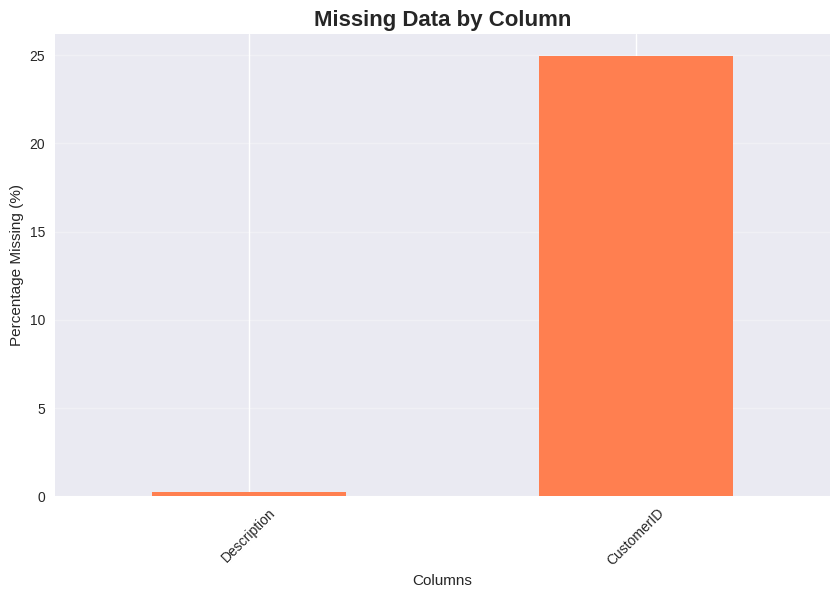

In [ ]:
# Check for missing values
print("🕳️ MISSING VALUES ANALYSIS")
print("=" * 50)
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percent
})

print(missing_df[missing_df['Missing Count'] > 0])

# Visualize missing data
plt.figure(figsize=(10, 6))
missing_df[missing_df['Missing Count'] > 0]['Percentage'].plot(kind='bar', color='coral')
plt.title('Missing Data by Column', fontsize=16, fontweight='bold')
plt.ylabel('Percentage Missing (%)')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

In [ ]:
# Check for duplicates
print("🔄 DUPLICATE ANALYSIS")
print("=" * 50)
duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {duplicates:,}")
print(f"Percentage of duplicates: {(duplicates/len(df)*100):.2f}%")

if duplicates > 0:
    print("\n📋 Sample duplicate rows:")
    print(df[df.duplicated()].head())

🔄 DUPLICATE ANALYSIS
Total duplicate rows: 5,268
Percentage of duplicates: 0.97%

📋 Sample duplicate rows:
    InvoiceNo StockCode                        Description  Quantity  \
517    536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527    536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537    536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539    536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555    536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   

            InvoiceDate  UnitPrice  CustomerID         Country  
517 2010-12-01 11:45:00       1.25     17908.0  United Kingdom  
527 2010-12-01 11:45:00       2.10     17908.0  United Kingdom  
537 2010-12-01 11:45:00       2.95     17908.0  United Kingdom  
539 2010-12-01 11:45:00       4.95     17908.0  United Kingdom  
555 2010-12-01 11:49:00       2.95     17920.0  United Kingdom  


In [ ]:
# Examine unique values in key columns
print("🔢 UNIQUE VALUES ANALYSIS")
print("=" * 50)
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count:,} unique values")

print(f"\n🌍 Countries represented:")
print(df['Country'].value_counts().head(10))

🔢 UNIQUE VALUES ANALYSIS
InvoiceNo: 25,900 unique values
StockCode: 4,070 unique values
Description: 4,223 unique values
Quantity: 722 unique values
InvoiceDate: 23,260 unique values
UnitPrice: 1,630 unique values
CustomerID: 4,372 unique values
Country: 38 unique values

🌍 Countries represented:
Country
United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         2002
Portugal            1519
Australia           1259
Name: count, dtype: int64


## 4️⃣ Business Questions & Analysis

### 🤔 Business Question 1: What are the data quality issues we need to address?

In [ ]:
# Examine negative quantities (returns/cancellations)
print("❌ NEGATIVE QUANTITIES ANALYSIS")
print("=" * 50)
negative_qty = df[df['Quantity'] < 0]
print(f"Transactions with negative quantities: {len(negative_qty):,}")
print(f"Percentage: {(len(negative_qty)/len(df)*100):.2f}%")

print("\n📋 Sample negative quantity transactions:")
print(negative_qty[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice']].head())

❌ NEGATIVE QUANTITIES ANALYSIS
Transactions with negative quantities: 10,624
Percentage: 1.96%

📋 Sample negative quantity transactions:
    InvoiceNo StockCode                       Description  Quantity  UnitPrice
141   C536379         D                          Discount        -1      27.50
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1       4.65
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12       1.65
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24       0.29
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24       0.29


In [ ]:
# Examine zero/negative unit prices
print("💰 UNIT PRICE ANALYSIS")
print("=" * 50)
zero_price = df[df['UnitPrice'] <= 0]
print(f"Transactions with zero/negative unit price: {len(zero_price):,}")
print(f"Percentage: {(len(zero_price)/len(df)*100):.2f}%")

if len(zero_price) > 0:
    print("\n📋 Sample zero price transactions:")
    print(zero_price[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice']].head())

💰 UNIT PRICE ANALYSIS
Transactions with zero/negative unit price: 2,517
Percentage: 0.46%

📋 Sample zero price transactions:
     InvoiceNo StockCode Description  Quantity  UnitPrice
622     536414     22139         NaN        56        0.0
1970    536545     21134         NaN         1        0.0
1971    536546     22145         NaN         1        0.0
1972    536547     37509         NaN         1        0.0
1987    536549    85226A         NaN         1        0.0


In [ ]:
# Create a clean dataset for analysis
print("🧹 DATA CLEANING")
print("=" * 50)
print(f"Original dataset size: {len(df):,} rows")

# Remove rows with missing CustomerID (can't do customer analysis without it)
df_clean = df.dropna(subset=['CustomerID']).copy()
print(f"After removing missing CustomerID: {len(df_clean):,} rows")

# Remove transactions with negative quantities (returns/cancellations)
df_clean = df_clean[df_clean['Quantity'] > 0]
print(f"After removing negative quantities: {len(df_clean):,} rows")

# Remove transactions with zero/negative unit prices
df_clean = df_clean[df_clean['UnitPrice'] > 0]
print(f"After removing zero/negative prices: {len(df_clean):,} rows")

# Calculate total amount for each transaction
df_clean['TotalAmount'] = df_clean['Quantity'] * df_clean['UnitPrice']

print(f"\n✅ Clean dataset ready: {len(df_clean):,} rows")
print(f"Data retention: {(len(df_clean)/len(df)*100):.1f}%")

🧹 DATA CLEANING
Original dataset size: 541,909 rows
After removing missing CustomerID: 406,829 rows
After removing negative quantities: 397,924 rows
After removing zero/negative prices: 397,884 rows

✅ Clean dataset ready: 397,884 rows
Data retention: 73.4%


### 🤔 Business Question 2: When do customers shop most?

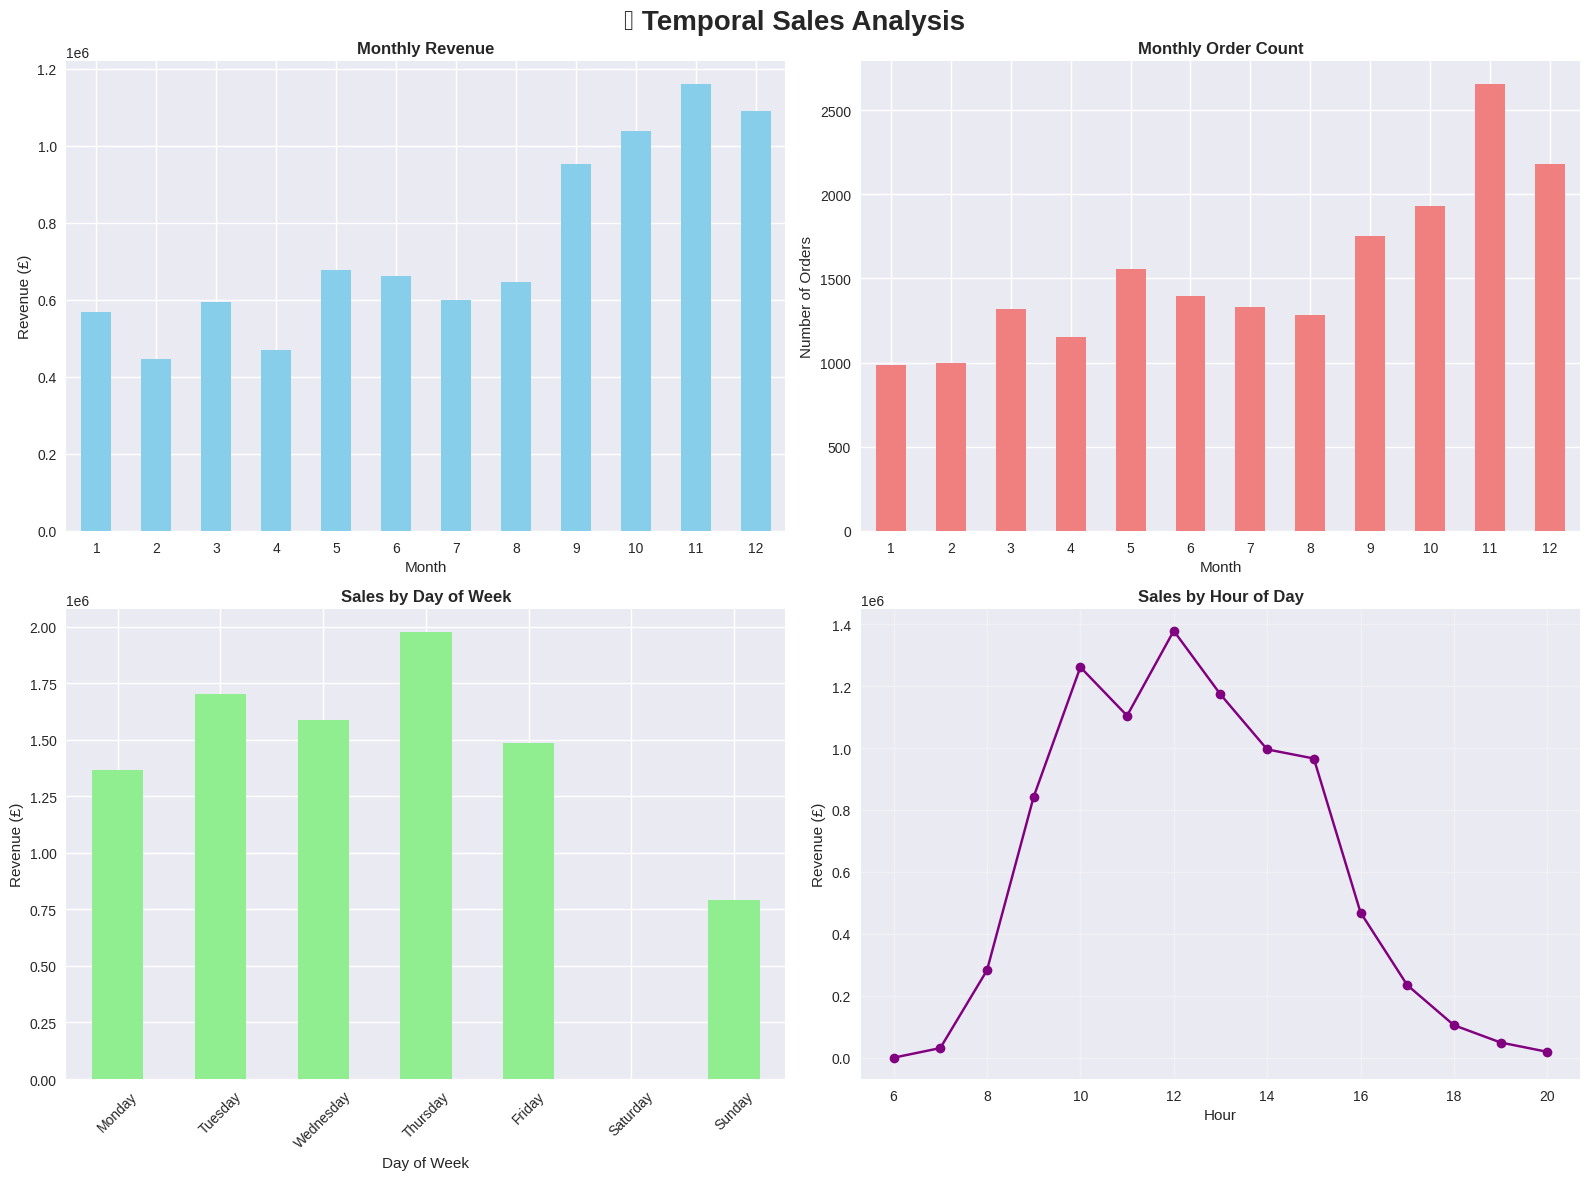

📊 KEY INSIGHTS:
🔥 Peak month: 11 (£1,161,817)
📅 Best day: Thursday (£1,976,859)
⏰ Peak hour: 12:00 (£1,378,571)


In [ ]:
# Convert InvoiceDate to datetime and extract time components
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
df_clean['Year'] = df_clean['InvoiceDate'].dt.year
df_clean['Month'] = df_clean['InvoiceDate'].dt.month
df_clean['DayOfWeek'] = df_clean['InvoiceDate'].dt.day_name()
df_clean['Hour'] = df_clean['InvoiceDate'].dt.hour

# Sales by month
monthly_sales = df_clean.groupby('Month').agg({
    'TotalAmount': 'sum',
    'InvoiceNo': 'nunique'
}).round(2)
monthly_sales.columns = ['Total_Revenue', 'Number_of_Orders']

# Create subplots for temporal analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📅 Temporal Sales Analysis', fontsize=20, fontweight='bold')

# Monthly revenue
monthly_sales['Total_Revenue'].plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Monthly Revenue', fontweight='bold')
axes[0,0].set_xlabel('Month')
axes[0,0].set_ylabel('Revenue (£)')
axes[0,0].tick_params(axis='x', rotation=0)

# Monthly order count
monthly_sales['Number_of_Orders'].plot(kind='bar', ax=axes[0,1], color='lightcoral')
axes[0,1].set_title('Monthly Order Count', fontweight='bold')
axes[0,1].set_xlabel('Month')
axes[0,1].set_ylabel('Number of Orders')
axes[0,1].tick_params(axis='x', rotation=0)

# Day of week analysis
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_sales = df_clean.groupby('DayOfWeek')['TotalAmount'].sum().reindex(day_order)
day_sales.plot(kind='bar', ax=axes[1,0], color='lightgreen')
axes[1,0].set_title('Sales by Day of Week', fontweight='bold')
axes[1,0].set_xlabel('Day of Week')
axes[1,0].set_ylabel('Revenue (£)')
axes[1,0].tick_params(axis='x', rotation=45)

# Hourly analysis
hourly_sales = df_clean.groupby('Hour')['TotalAmount'].sum()
hourly_sales.plot(kind='line', ax=axes[1,1], color='purple', marker='o')
axes[1,1].set_title('Sales by Hour of Day', fontweight='bold')
axes[1,1].set_xlabel('Hour')
axes[1,1].set_ylabel('Revenue (£)')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 KEY INSIGHTS:")
print(f"🔥 Peak month: {monthly_sales['Total_Revenue'].idxmax()} (£{monthly_sales['Total_Revenue'].max():,.0f})")
print(f"📅 Best day: {day_sales.idxmax()} (£{day_sales.max():,.0f})")
print(f"⏰ Peak hour: {hourly_sales.idxmax()}:00 (£{hourly_sales.max():,.0f})")

### 🤔 Business Question 3: What are our best-selling products?

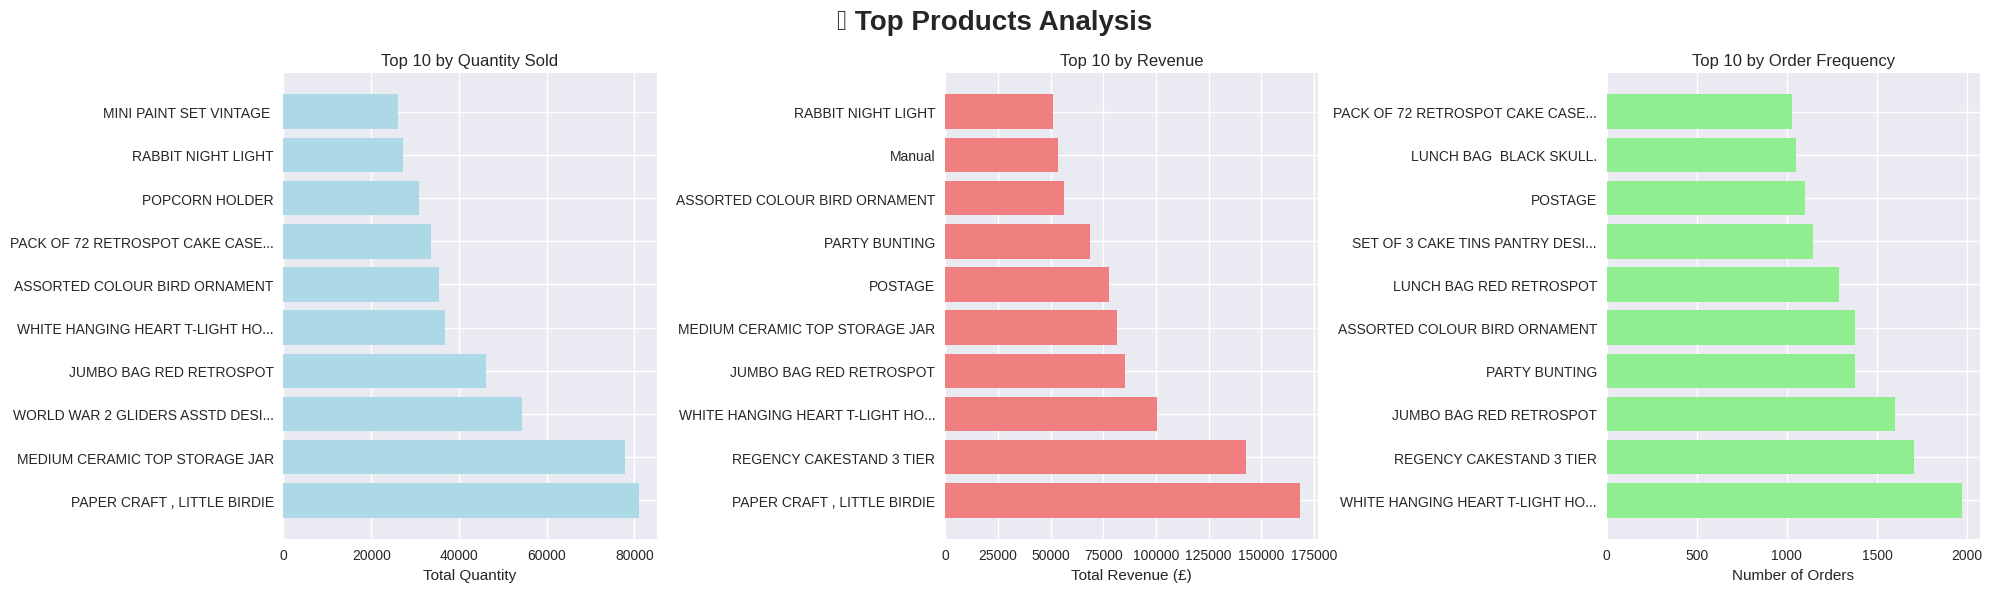

🏆 TOP PRODUCT INSIGHTS:
📦 Most sold item: PAPER CRAFT , LITTLE BIRDIE (80,995 units)
💰 Highest revenue: PAPER CRAFT , LITTLE BIRDIE (£168,470)
🔄 Most frequent: WHITE HANGING HEART T-LIGHT HOLDER (1,971 orders)


In [ ]:
# Product analysis
product_stats = df_clean.groupby(['StockCode', 'Description']).agg({
    'Quantity': 'sum',
    'TotalAmount': 'sum',
    'InvoiceNo': 'nunique'
}).round(2)
product_stats.columns = ['Total_Quantity', 'Total_Revenue', 'Number_of_Orders']
product_stats = product_stats.reset_index()

# Top products by different metrics
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('🏆 Top Products Analysis', fontsize=20, fontweight='bold')

# Top by quantity
top_qty = product_stats.nlargest(10, 'Total_Quantity')
axes[0].barh(range(len(top_qty)), top_qty['Total_Quantity'], color='lightblue')
axes[0].set_yticks(range(len(top_qty)))
axes[0].set_yticklabels([desc[:30] + '...' if len(desc) > 30 else desc for desc in top_qty['Description']])
axes[0].set_title('Top 10 by Quantity Sold')
axes[0].set_xlabel('Total Quantity')

# Top by revenue
top_rev = product_stats.nlargest(10, 'Total_Revenue')
axes[1].barh(range(len(top_rev)), top_rev['Total_Revenue'], color='lightcoral')
axes[1].set_yticks(range(len(top_rev)))
axes[1].set_yticklabels([desc[:30] + '...' if len(desc) > 30 else desc for desc in top_rev['Description']])
axes[1].set_title('Top 10 by Revenue')
axes[1].set_xlabel('Total Revenue (£)')

# Top by order frequency
top_freq = product_stats.nlargest(10, 'Number_of_Orders')
axes[2].barh(range(len(top_freq)), top_freq['Number_of_Orders'], color='lightgreen')
axes[2].set_yticks(range(len(top_freq)))
axes[2].set_yticklabels([desc[:30] + '...' if len(desc) > 30 else desc for desc in top_freq['Description']])
axes[2].set_title('Top 10 by Order Frequency')
axes[2].set_xlabel('Number of Orders')

plt.tight_layout()
plt.show()

print("🏆 TOP PRODUCT INSIGHTS:")
print(f"📦 Most sold item: {top_qty.iloc[0]['Description']} ({top_qty.iloc[0]['Total_Quantity']:,.0f} units)")
print(f"💰 Highest revenue: {top_rev.iloc[0]['Description']} (£{top_rev.iloc[0]['Total_Revenue']:,.0f})")
print(f"🔄 Most frequent: {top_freq.iloc[0]['Description']} ({top_freq.iloc[0]['Number_of_Orders']:,.0f} orders)")

### 🤔 Business Question 4: Who are our most valuable customers?

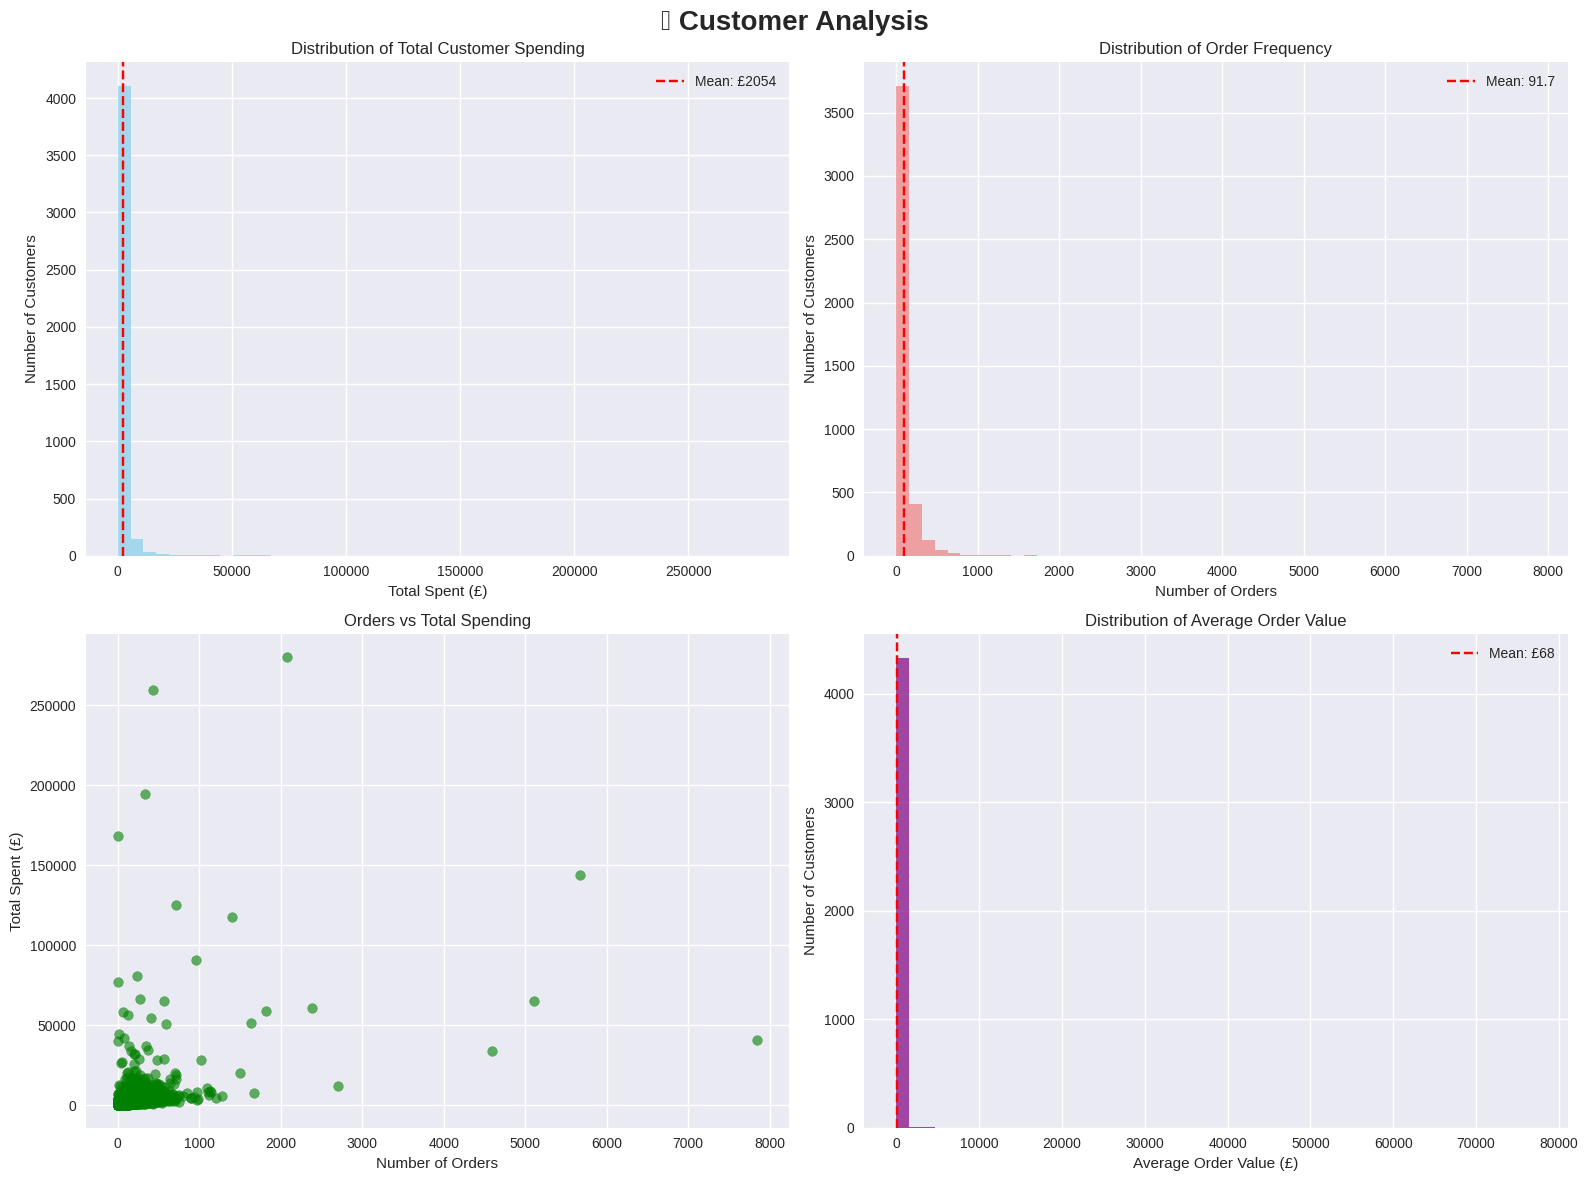

👑 TOP 10 CUSTOMERS BY TOTAL SPENDING:
 CustomerID  Total_Spent  Number_of_Orders  Avg_Order_Value
    14646.0    280206.02              2076           134.97
    18102.0    259657.30               431           602.45
    17450.0    194550.79               337           577.30
    16446.0    168472.50                 3         56157.50
    14911.0    143825.06              5675            25.34
    12415.0    124914.53               714           174.95
    14156.0    117379.63              1400            83.84
    17511.0     91062.38               963            94.56
    16029.0     81024.84               242           334.81
    12346.0     77183.60                 1         77183.60

📊 CUSTOMER INSIGHTS:
💰 Average customer value: £2054.27
🛒 Average orders per customer: 91.7
💳 Average order value: £68.35
🔝 Top 10% customers contribute: 61.3% of revenue


In [ ]:
# Customer analysis
customer_stats = df_clean.groupby('CustomerID').agg({
    'TotalAmount': ['sum', 'mean', 'count'],
    'Quantity': 'sum',
    'InvoiceDate': ['min', 'max']
}).round(2)

# Flatten column names
customer_stats.columns = ['Total_Spent', 'Avg_Order_Value', 'Number_of_Orders', 'Total_Items', 'First_Purchase', 'Last_Purchase']
customer_stats = customer_stats.reset_index()

# Calculate customer lifetime (days)
customer_stats['Customer_Lifetime_Days'] = (customer_stats['Last_Purchase'] - customer_stats['First_Purchase']).dt.days

# Customer segmentation visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('👥 Customer Analysis', fontsize=20, fontweight='bold')

# Distribution of total spent
axes[0,0].hist(customer_stats['Total_Spent'], bins=50, color='skyblue', alpha=0.7)
axes[0,0].set_title('Distribution of Total Customer Spending')
axes[0,0].set_xlabel('Total Spent (£)')
axes[0,0].set_ylabel('Number of Customers')
axes[0,0].axvline(customer_stats['Total_Spent'].mean(), color='red', linestyle='--', label=f'Mean: £{customer_stats["Total_Spent"].mean():.0f}')
axes[0,0].legend()

# Distribution of order frequency
axes[0,1].hist(customer_stats['Number_of_Orders'], bins=50, color='lightcoral', alpha=0.7)
axes[0,1].set_title('Distribution of Order Frequency')
axes[0,1].set_xlabel('Number of Orders')
axes[0,1].set_ylabel('Number of Customers')
axes[0,1].axvline(customer_stats['Number_of_Orders'].mean(), color='red', linestyle='--', label=f'Mean: {customer_stats["Number_of_Orders"].mean():.1f}')
axes[0,1].legend()

# Scatter plot: Orders vs Spending
axes[1,0].scatter(customer_stats['Number_of_Orders'], customer_stats['Total_Spent'], alpha=0.6, color='green')
axes[1,0].set_title('Orders vs Total Spending')
axes[1,0].set_xlabel('Number of Orders')
axes[1,0].set_ylabel('Total Spent (£)')

# Average order value distribution
axes[1,1].hist(customer_stats['Avg_Order_Value'], bins=50, color='purple', alpha=0.7)
axes[1,1].set_title('Distribution of Average Order Value')
axes[1,1].set_xlabel('Average Order Value (£)')
axes[1,1].set_ylabel('Number of Customers')
axes[1,1].axvline(customer_stats['Avg_Order_Value'].mean(), color='red', linestyle='--', label=f'Mean: £{customer_stats["Avg_Order_Value"].mean():.0f}')
axes[1,1].legend()

plt.tight_layout()
plt.show()

# Top customers
print("👑 TOP 10 CUSTOMERS BY TOTAL SPENDING:")
top_customers = customer_stats.nlargest(10, 'Total_Spent')[['CustomerID', 'Total_Spent', 'Number_of_Orders', 'Avg_Order_Value']]
print(top_customers.to_string(index=False))

print(f"\n📊 CUSTOMER INSIGHTS:")
print(f"💰 Average customer value: £{customer_stats['Total_Spent'].mean():.2f}")
print(f"🛒 Average orders per customer: {customer_stats['Number_of_Orders'].mean():.1f}")
print(f"💳 Average order value: £{customer_stats['Avg_Order_Value'].mean():.2f}")
print(f"🔝 Top 10% customers contribute: {(customer_stats.nlargest(int(len(customer_stats)*0.1), 'Total_Spent')['Total_Spent'].sum() / customer_stats['Total_Spent'].sum() * 100):.1f}% of revenue")

### 🤔 Business Question 5: Which countries generate the most revenue?

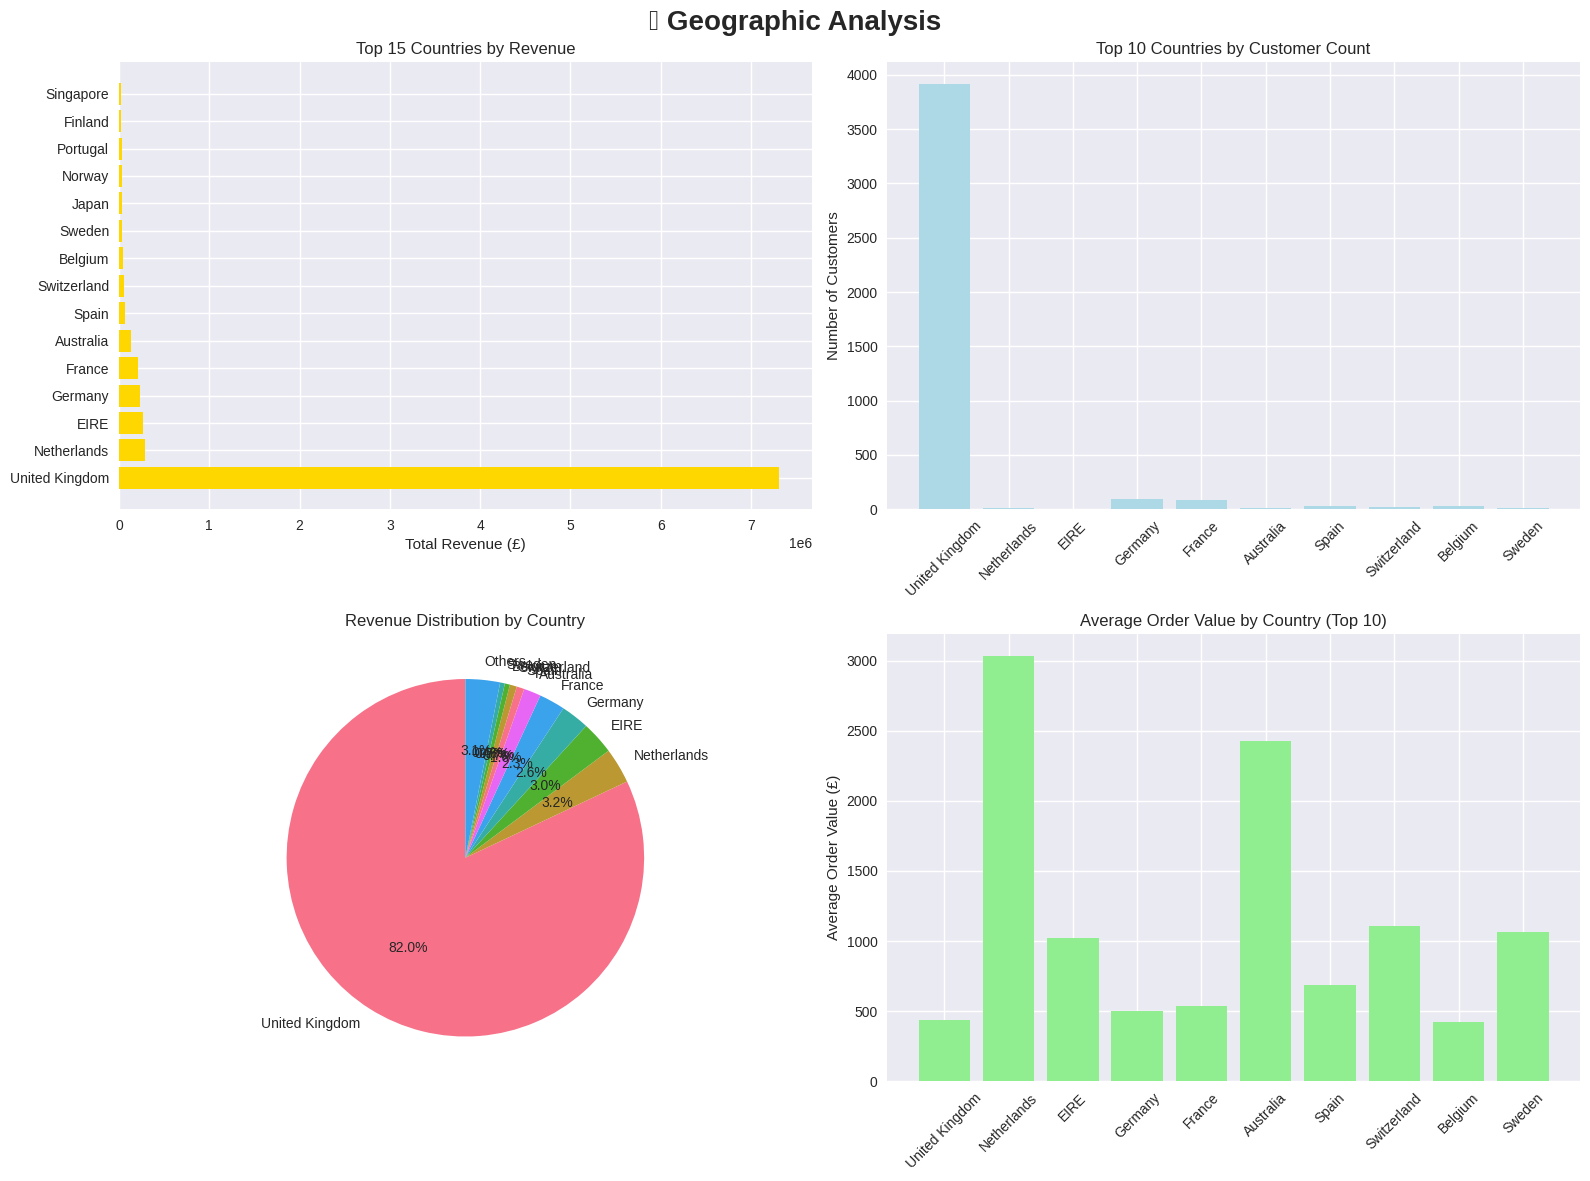

🌍 GEOGRAPHIC INSIGHTS:
🥇 Top revenue country: United Kingdom (£7,308,392)
👥 Most customers: United Kingdom (3,920 customers)
💳 Highest AOV: Singapore (£3039.90)
🏴󠁧󠁢󠁥󠁮󠁧󠁿 UK dominance: 82.0% of total revenue


In [ ]:
# Country analysis
country_stats = df_clean.groupby('Country').agg({
    'TotalAmount': 'sum',
    'CustomerID': 'nunique',
    'InvoiceNo': 'nunique',
    'Quantity': 'sum'
}).round(2)
country_stats.columns = ['Total_Revenue', 'Unique_Customers', 'Number_of_Orders', 'Total_Quantity']
country_stats = country_stats.sort_values('Total_Revenue', ascending=False).reset_index()

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('🌍 Geographic Analysis', fontsize=20, fontweight='bold')

# Top countries by revenue
top_countries = country_stats.head(15)
axes[0,0].barh(range(len(top_countries)), top_countries['Total_Revenue'], color='gold')
axes[0,0].set_yticks(range(len(top_countries)))
axes[0,0].set_yticklabels(top_countries['Country'])
axes[0,0].set_title('Top 15 Countries by Revenue')
axes[0,0].set_xlabel('Total Revenue (£)')

# Countries by customer count
top_customers_country = country_stats.head(10)
axes[0,1].bar(range(len(top_customers_country)), top_customers_country['Unique_Customers'], color='lightblue')
axes[0,1].set_xticks(range(len(top_customers_country)))
axes[0,1].set_xticklabels(top_customers_country['Country'], rotation=45)
axes[0,1].set_title('Top 10 Countries by Customer Count')
axes[0,1].set_ylabel('Number of Customers')

# Revenue distribution (pie chart for top 10)
top_10_countries = country_stats.head(10)
others_revenue = country_stats.iloc[10:]['Total_Revenue'].sum()
pie_data = list(top_10_countries['Total_Revenue']) + [others_revenue]
pie_labels = list(top_10_countries['Country']) + ['Others']

axes[1,0].pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90)
axes[1,0].set_title('Revenue Distribution by Country')

# Average order value by country (top 10)
country_stats['Avg_Order_Value'] = country_stats['Total_Revenue'] / country_stats['Number_of_Orders']
top_aov = country_stats.head(10)
axes[1,1].bar(range(len(top_aov)), top_aov['Avg_Order_Value'], color='lightgreen')
axes[1,1].set_xticks(range(len(top_aov)))
axes[1,1].set_xticklabels(top_aov['Country'], rotation=45)
axes[1,1].set_title('Average Order Value by Country (Top 10)')
axes[1,1].set_ylabel('Average Order Value (£)')

plt.tight_layout()
plt.show()

print("🌍 GEOGRAPHIC INSIGHTS:")
print(f"🥇 Top revenue country: {country_stats.iloc[0]['Country']} (£{country_stats.iloc[0]['Total_Revenue']:,.0f})")
print(f"👥 Most customers: {country_stats.loc[country_stats['Unique_Customers'].idxmax(), 'Country']} ({country_stats['Unique_Customers'].max():,} customers)")
print(f"💳 Highest AOV: {country_stats.loc[country_stats['Avg_Order_Value'].idxmax(), 'Country']} (£{country_stats['Avg_Order_Value'].max():.2f})")
print(f"🏴󠁧󠁢󠁥󠁮󠁧󠁿 UK dominance: {(country_stats[country_stats['Country'] == 'United Kingdom']['Total_Revenue'].values[0] / country_stats['Total_Revenue'].sum() * 100):.1f}% of total revenue")

### 🤔 Business Question 6: Are there seasonal patterns?

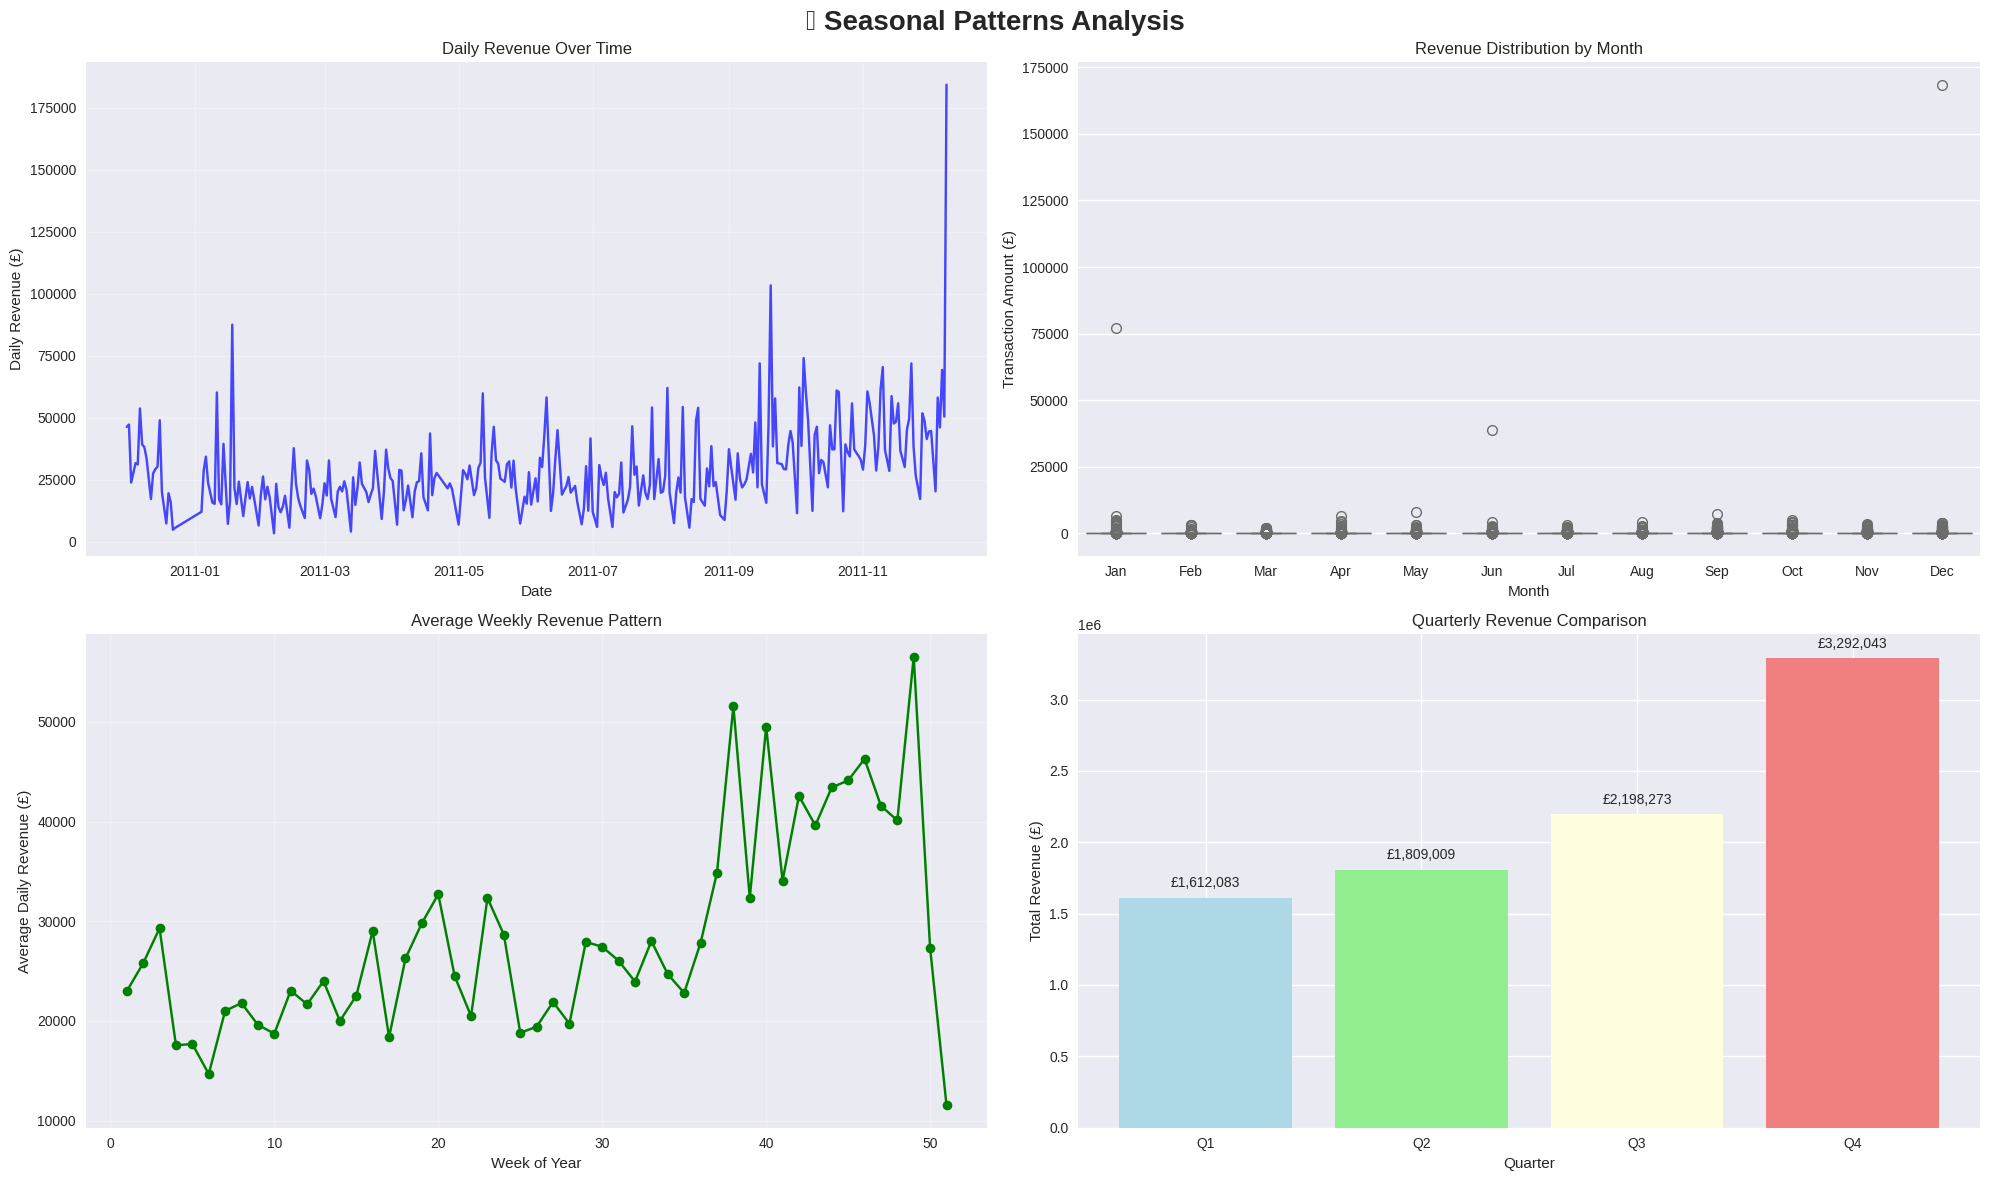

📅 SEASONAL INSIGHTS:
🔥 Peak month: Nov (Month 11)
📈 Peak quarter: Q4 (£3,292,043)
📊 Q4 vs Q1 growth: +104.2%
🎄 Holiday shopping effect: Clear revenue spike in November-December


In [ ]:
# Create date-based aggregations for time series analysis
df_clean['Date'] = df_clean['InvoiceDate'].dt.date
daily_sales = df_clean.groupby('Date').agg({
    'TotalAmount': 'sum',
    'InvoiceNo': 'nunique',
    'CustomerID': 'nunique'
}).reset_index()
daily_sales.columns = ['Date', 'Daily_Revenue', 'Daily_Orders', 'Daily_Customers']
daily_sales['Date'] = pd.to_datetime(daily_sales['Date'])

# Weekly aggregation
daily_sales['Week'] = daily_sales['Date'].dt.isocalendar().week
daily_sales['Month'] = daily_sales['Date'].dt.month
daily_sales['Year'] = daily_sales['Date'].dt.year

# Create seasonal analysis
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('📅 Seasonal Patterns Analysis', fontsize=20, fontweight='bold')

# Daily revenue time series
axes[0,0].plot(daily_sales['Date'], daily_sales['Daily_Revenue'], color='blue', alpha=0.7)
axes[0,0].set_title('Daily Revenue Over Time')
axes[0,0].set_xlabel('Date')
axes[0,0].set_ylabel('Daily Revenue (£)')
axes[0,0].grid(True, alpha=0.3)

# Monthly revenue boxplot
monthly_data = df_clean.groupby([df_clean['InvoiceDate'].dt.to_period('M')])['TotalAmount'].sum().reset_index()
monthly_data['Month'] = monthly_data['InvoiceDate'].dt.month
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.boxplot(data=df_clean, x='Month', y='TotalAmount', ax=axes[0,1])
axes[0,1].set_title('Revenue Distribution by Month')
axes[0,1].set_xlabel('Month')
axes[0,1].set_ylabel('Transaction Amount (£)')
axes[0,1].set_xticklabels(month_names)

# Weekly pattern
weekly_avg = daily_sales.groupby('Week')['Daily_Revenue'].mean()
axes[1,0].plot(weekly_avg.index, weekly_avg.values, marker='o', color='green')
axes[1,0].set_title('Average Weekly Revenue Pattern')
axes[1,0].set_xlabel('Week of Year')
axes[1,0].set_ylabel('Average Daily Revenue (£)')
axes[1,0].grid(True, alpha=0.3)

# Quarterly comparison
df_clean['Quarter'] = df_clean['InvoiceDate'].dt.quarter
quarterly_sales = df_clean.groupby('Quarter')['TotalAmount'].sum()
axes[1,1].bar(['Q1', 'Q2', 'Q3', 'Q4'], quarterly_sales.values, color=['lightblue', 'lightgreen', 'lightyellow', 'lightcoral'])
axes[1,1].set_title('Quarterly Revenue Comparison')
axes[1,1].set_xlabel('Quarter')
axes[1,1].set_ylabel('Total Revenue (£)')

# Add value labels on bars
for i, v in enumerate(quarterly_sales.values):
    axes[1,1].text(i, v + 50000, f'£{v:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("📅 SEASONAL INSIGHTS:")
peak_month = df_clean.groupby('Month')['TotalAmount'].sum().idxmax()
peak_quarter = quarterly_sales.idxmax()
print(f"🔥 Peak month: {month_names[peak_month-1]} (Month {peak_month})")
print(f"📈 Peak quarter: Q{peak_quarter} (£{quarterly_sales[peak_quarter]:,.0f})")
print(f"📊 Q4 vs Q1 growth: {((quarterly_sales[4] / quarterly_sales[1] - 1) * 100):+.1f}%")
print(f"🎄 Holiday shopping effect: Clear revenue spike in November-December")

## 5️⃣ Summary Dashboard

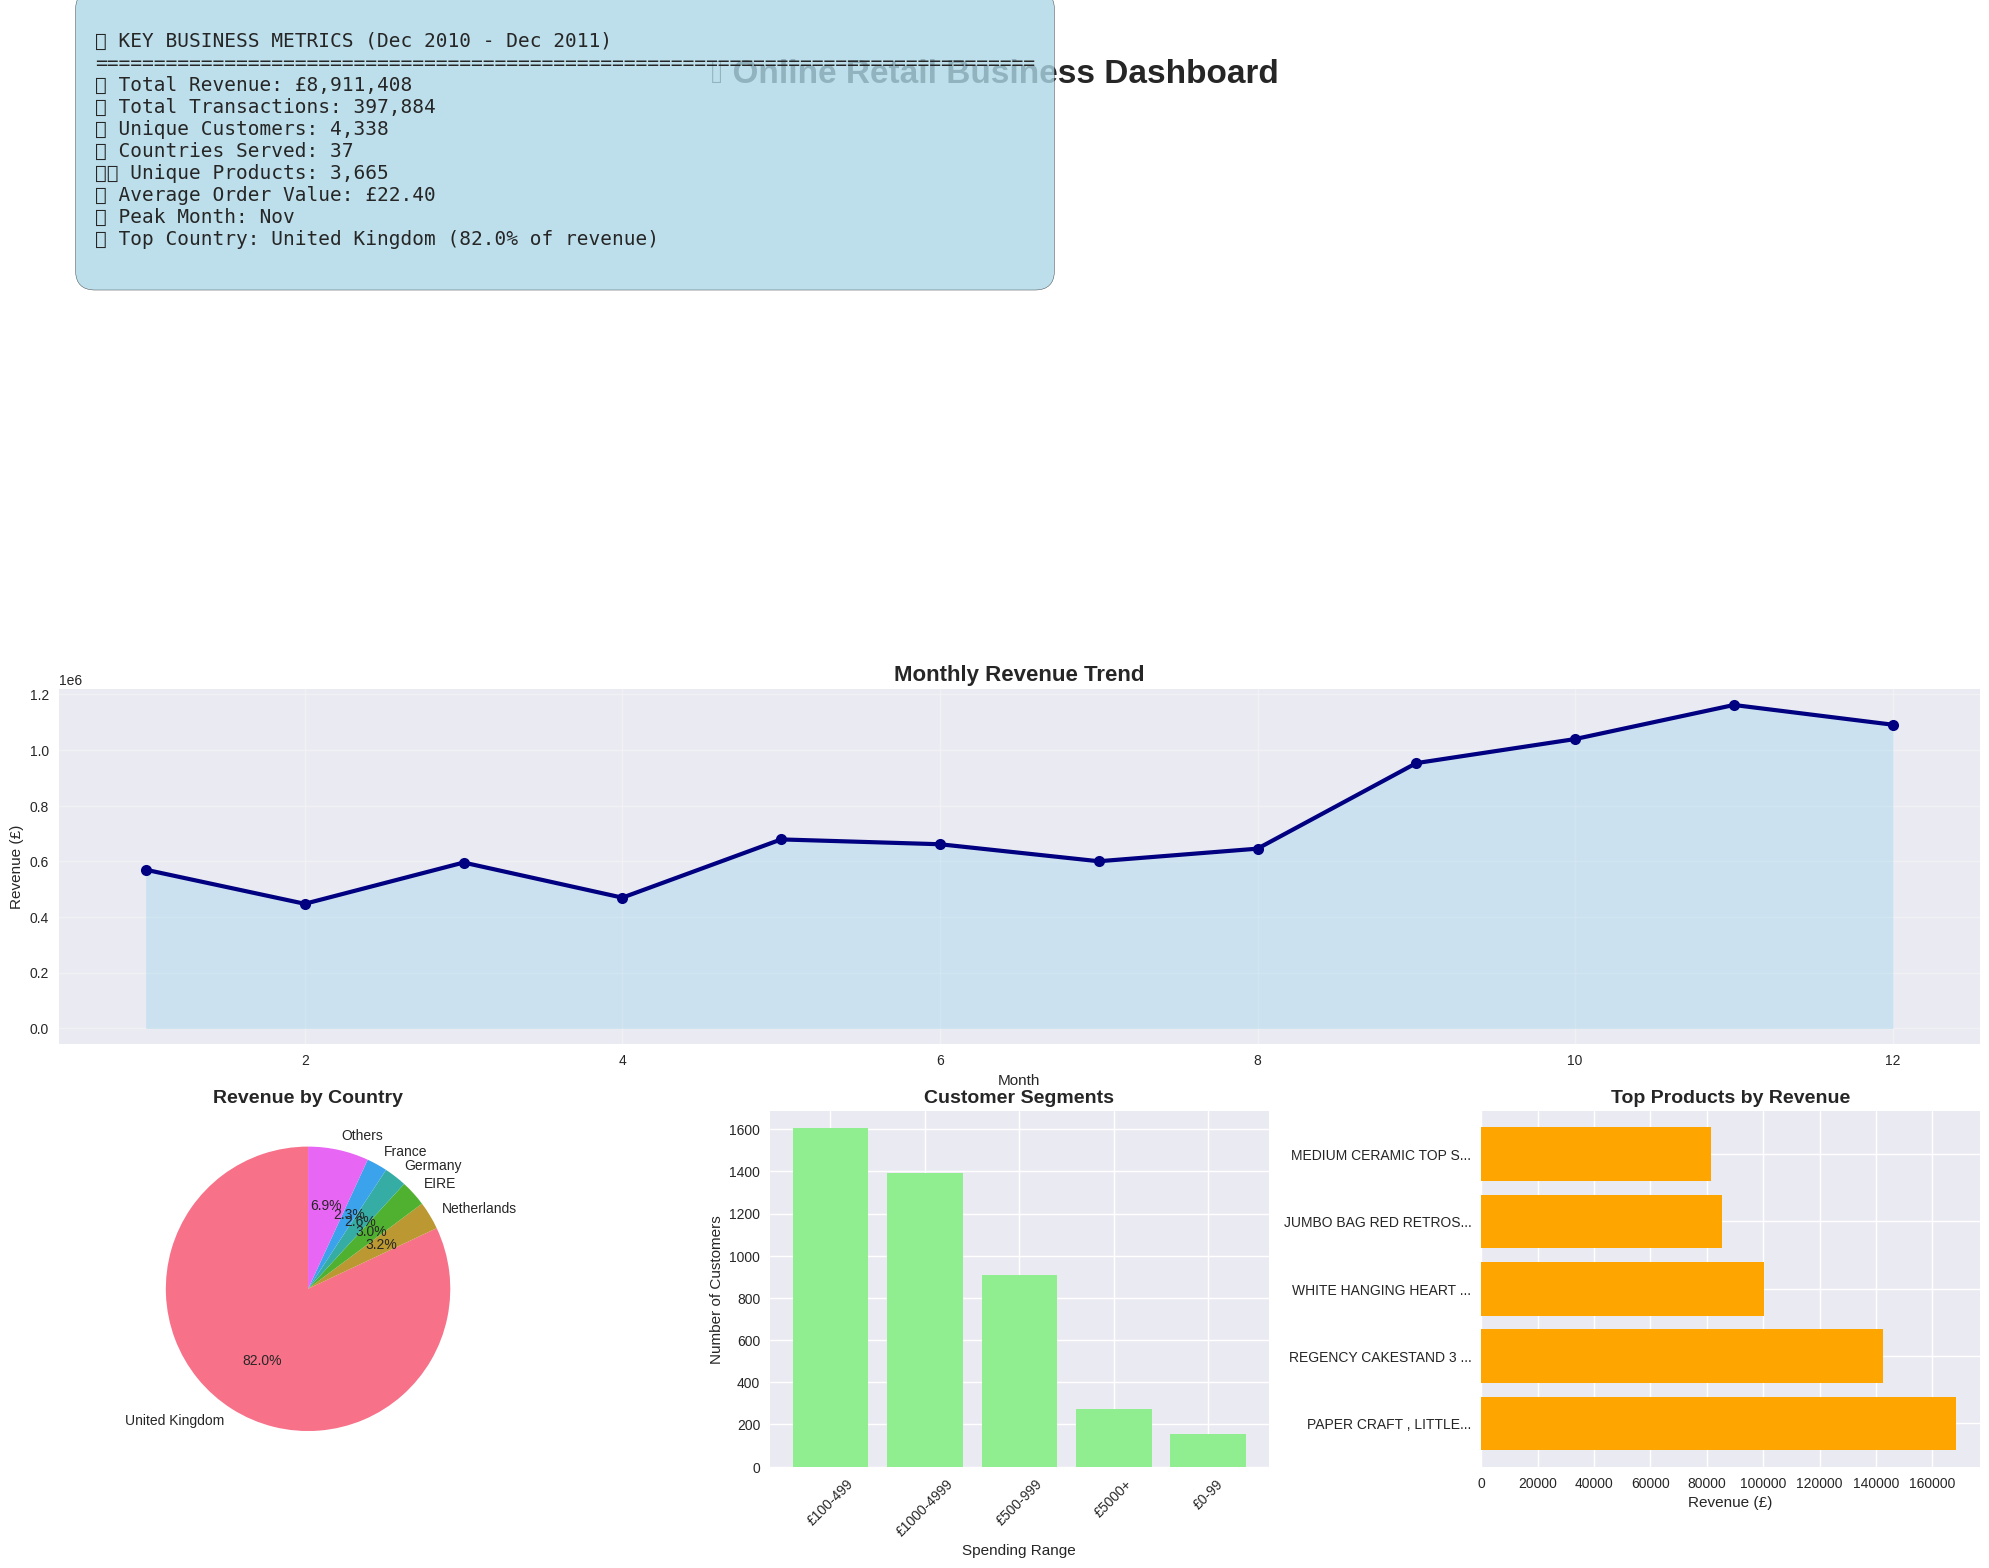

In [ ]:
# Create a comprehensive summary dashboard
fig = plt.figure(figsize=(20, 16))
fig.suptitle('📊 Online Retail Business Dashboard', fontsize=24, fontweight='bold', y=0.98)

# Key metrics at the top
metrics_text = f"""
🎯 KEY BUSINESS METRICS (Dec 2010 - Dec 2011)
{'='*80}
💰 Total Revenue: £{df_clean['TotalAmount'].sum():,.0f}
📦 Total Transactions: {len(df_clean):,}
👥 Unique Customers: {df_clean['CustomerID'].nunique():,}
🌍 Countries Served: {df_clean['Country'].nunique()}
🛍️ Unique Products: {df_clean['StockCode'].nunique():,}
💳 Average Order Value: £{df_clean['TotalAmount'].mean():.2f}
📅 Peak Month: {month_names[df_clean.groupby('Month')['TotalAmount'].sum().idxmax()-1]}
🏆 Top Country: {country_stats.iloc[0]['Country']} ({(country_stats.iloc[0]['Total_Revenue'] / country_stats['Total_Revenue'].sum() * 100):.1f}% of revenue)
"""

plt.figtext(0.05, 0.85, metrics_text, fontsize=14, fontfamily='monospace',
           bbox=dict(boxstyle="round,pad=1", facecolor="lightblue", alpha=0.8))

# Revenue trend
ax1 = plt.subplot(3, 3, (4, 6))
monthly_revenue = df_clean.groupby('Month')['TotalAmount'].sum()
ax1.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linewidth=3, markersize=8, color='navy')
ax1.fill_between(monthly_revenue.index, monthly_revenue.values, alpha=0.3, color='skyblue')
ax1.set_title('Monthly Revenue Trend', fontsize=16, fontweight='bold')
ax1.set_xlabel('Month')
ax1.set_ylabel('Revenue (£)')
ax1.grid(True, alpha=0.3)

# Top countries pie chart
ax2 = plt.subplot(3, 3, 7)
top_5_countries = country_stats.head(5)
others_rev = country_stats.iloc[5:]['Total_Revenue'].sum()
pie_data = list(top_5_countries['Total_Revenue']) + [others_rev]
pie_labels = list(top_5_countries['Country']) + ['Others']
ax2.pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90)
ax2.set_title('Revenue by Country', fontsize=14, fontweight='bold')

# Customer distribution
ax3 = plt.subplot(3, 3, 8)
customer_bins = [0, 100, 500, 1000, 5000, float('inf')]
customer_labels = ['£0-99', '£100-499', '£500-999', '£1000-4999', '£5000+']
customer_stats['Spending_Segment'] = pd.cut(customer_stats['Total_Spent'], bins=customer_bins, labels=customer_labels, right=False)
segment_counts = customer_stats['Spending_Segment'].value_counts()
ax3.bar(segment_counts.index, segment_counts.values, color='lightgreen')
ax3.set_title('Customer Segments', fontsize=14, fontweight='bold')
ax3.set_xlabel('Spending Range')
ax3.set_ylabel('Number of Customers')
ax3.tick_params(axis='x', rotation=45)

# Top products
ax4 = plt.subplot(3, 3, 9)
top_5_products = product_stats.nlargest(5, 'Total_Revenue')
product_names = [name[:20] + '...' if len(name) > 20 else name for name in top_5_products['Description']]
ax4.barh(range(len(top_5_products)), top_5_products['Total_Revenue'], color='orange')
ax4.set_yticks(range(len(top_5_products)))
ax4.set_yticklabels(product_names)
ax4.set_title('Top Products by Revenue', fontsize=14, fontweight='bold')
ax4.set_xlabel('Revenue (£)')

plt.tight_layout()
plt.subplots_adjust(top=0.85, bottom=0.1)
plt.show()

## 6️⃣ Key Findings & Business Recommendations

In [ ]:
print("🎯 KEY FINDINGS & BUSINESS RECOMMENDATIONS")
print("=" * 60)

print("\n📊 DATA QUALITY INSIGHTS:")
print(f"• {(len(df) - len(df_clean))/len(df)*100:.1f}% of data required cleaning")
print(f"• {df['CustomerID'].isnull().sum():,} transactions missing customer info")
print(f"• {len(df[df['Quantity'] < 0]):,} return/cancellation transactions")

print("\n🎯 BUSINESS OPPORTUNITIES:")
uk_revenue_pct = country_stats[country_stats['Country'] == 'United Kingdom']['Total_Revenue'].values[0] / country_stats['Total_Revenue'].sum() * 100
print(f"• UK dominates with {uk_revenue_pct:.1f}% of revenue - explore international expansion")
print(f"• Clear seasonality - {month_names[df_clean.groupby('Month')['TotalAmount'].sum().idxmax()-1]} peak suggests holiday shopping")
print(f"• Customer concentration - top 10% generate {(customer_stats.nlargest(int(len(customer_stats)*0.1), 'Total_Spent')['Total_Spent'].sum() / customer_stats['Total_Spent'].sum() * 100):.1f}% of revenue")

print("\n🚀 RECOMMENDED ACTIONS:")
print("• Implement customer retention programs for high-value segments")
print("• Expand marketing in international markets (especially Europe)")
print("• Optimize inventory for seasonal demand patterns")
print("• Focus on wholesale customer acquisition (high AOV)")
print("• Improve data collection to reduce missing customer information")

print("\n🎓 WHAT WE LEARNED:")
print("• EDA reveals both opportunities and data quality issues")
print("• Visualizations make patterns immediately apparent")
print("• Business questions guide the analysis direction")
print("• Real data is messy - cleaning is essential")
print("• Multiple perspectives reveal different insights")

🎯 KEY FINDINGS & BUSINESS RECOMMENDATIONS

📊 DATA QUALITY INSIGHTS:
• 26.6% of data required cleaning
• 135,080 transactions missing customer info
• 10,624 return/cancellation transactions

🎯 BUSINESS OPPORTUNITIES:
• UK dominates with 82.0% of revenue - explore international expansion
• Clear seasonality - Nov peak suggests holiday shopping
• Customer concentration - top 10% generate 61.3% of revenue

🚀 RECOMMENDED ACTIONS:
• Implement customer retention programs for high-value segments
• Expand marketing in international markets (especially Europe)
• Optimize inventory for seasonal demand patterns
• Focus on wholesale customer acquisition (high AOV)
• Improve data collection to reduce missing customer information

🎓 WHAT WE LEARNED:
• EDA reveals both opportunities and data quality issues
• Visualizations make patterns immediately apparent
• Business questions guide the analysis direction
• Real data is messy - cleaning is essential
• Multiple perspectives reveal different insights


## 7️⃣ Next Steps: Preparing for AI Agents

In [ ]:
# Save the cleaned dataset for future use
print("💾 SAVING CLEANED DATASET FOR FUTURE ANALYSIS")
print("=" * 50)

# Add some derived features that could be useful for modeling
df_clean['Revenue_Per_Item'] = df_clean['TotalAmount'] / df_clean['Quantity']
df_clean['Is_Weekend'] = df_clean['DayOfWeek'].isin(['Saturday', 'Sunday'])
df_clean['Is_Holiday_Season'] = df_clean['Month'].isin([11, 12])  # Nov-Dec

# Create customer-level features for future modeling
customer_features = df_clean.groupby('CustomerID').agg({
    'TotalAmount': ['sum', 'mean', 'std', 'count'],
    'Quantity': ['sum', 'mean'],
    'InvoiceDate': ['min', 'max'],
    'Country': 'first',
    'StockCode': 'nunique'
}).round(2)

# Flatten column names
customer_features.columns = ['Total_Spent', 'Avg_Order_Value', 'Std_Order_Value', 'Order_Count',
                           'Total_Items', 'Avg_Items_Per_Order', 'First_Purchase', 'Last_Purchase',
                           'Country', 'Unique_Products']

customer_features['Days_Active'] = (customer_features['Last_Purchase'] - customer_features['First_Purchase']).dt.days + 1
customer_features['Avg_Days_Between_Orders'] = customer_features['Days_Active'] / customer_features['Order_Count']

print(f"✅ Cleaned transaction data: {len(df_clean):,} rows, {len(df_clean.columns)} columns")
print(f"✅ Customer features: {len(customer_features):,} customers, {len(customer_features.columns)} features")

print("\n🤖 POTENTIAL AI AGENT APPLICATIONS:")
print("• Customer Churn Prediction Agent")
print("• Product Recommendation Agent")
print("• Inventory Forecasting Agent")
print("• Fraud Detection Agent")
print("• Price Optimization Agent")
print("• Customer Segmentation Agent")

print("\n📈 NEXT CLASS PREVIEW:")
print("• Building interactive dashboards with Streamlit")
print("• Creating visualization agents")
print("• Deploying your first data agent")

# Save datasets (in a real environment)
# df_clean.to_csv('online_retail_cleaned.csv', index=False)
# customer_features.to_csv('customer_features.csv', index=True)
print("\n💡 TIP: In your projects, always save cleaned data for reuse!")

💾 SAVING CLEANED DATASET FOR FUTURE ANALYSIS
✅ Cleaned transaction data: 397,884 rows, 18 columns
✅ Customer features: 4,338 customers, 12 features

🤖 POTENTIAL AI AGENT APPLICATIONS:
• Customer Churn Prediction Agent
• Product Recommendation Agent
• Inventory Forecasting Agent
• Fraud Detection Agent
• Price Optimization Agent
• Customer Segmentation Agent

📈 NEXT CLASS PREVIEW:
• Building interactive dashboards with Streamlit
• Creating visualization agents
• Deploying your first data agent

💡 TIP: In your projects, always save cleaned data for reuse!


---


## 🚀 Ready for the Next Challenge?
Now that you understand your data, you're ready to build AI agents that can:
- Automatically generate these insights
- Create interactive dashboards
- Make predictions and recommendations
- Monitor business performance in real-time

**Next Class:** We'll build our first data visualization agent using Streamlit!

---
*"Data is the new oil, but insights are the new gold!"* 💰